<a href="https://colab.research.google.com/github/ElizaLo/Machine-Learning/blob/master/Projects/Pulsars/Pulsars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pulsar Star**

> [Dataset form Kaggle](https://www.kaggle.com/shivam1901/pulsar-star/activity)



In [1]:
!pip install scikit-plot

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import scikitplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scikitplot.estimators import plot_learning_curve

In [3]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [4]:
import os

In [5]:
img_dir = os.chdir("drive/My Drive/Colab Notebooks/Pulsars")

In [6]:
pd.read_csv('pulsar_stars.csv')

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [36]:
df=pd.read_csv('pulsar_stars.csv')

In [19]:
compare_score={}

## **Logistic Regression**

Test accuracy: 96.64804469273743%


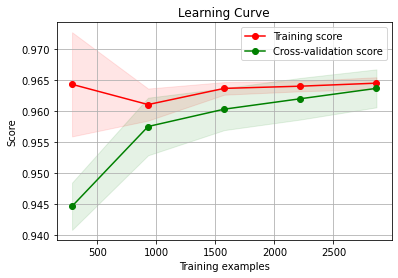

In [41]:
df=pd.read_csv('pulsar_stars.csv')

#Setting x and y and normalize the data
x_data=df.drop(columns='target_class')
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)) #scaling
y=df.target_class.values


#training and testing split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

lr=LogisticRegression()
lr.fit(x_train, y_train)

lr_score=lr.score(x_test, y_test) * 100
compare_score['Logistic Regression'] = lr_score

print('Test accuracy: {}%'.format(lr_score))

plot_learning_curve(lr, x_test, y_test)
plt.show()

## **Decision Tree Classifier with Ada Boost Classifier**

Accuracy = 97.01%


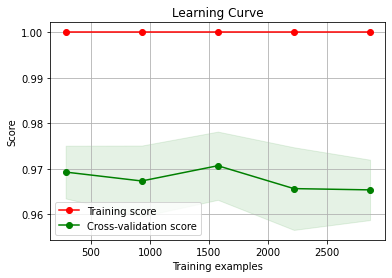

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics 

df=pd.read_csv('pulsar_stars.csv')

#We first decide on how to split the data into features and labels
#features:
features=df.columns[:-1]
X=df[features]
#output:
y=df.target_class

#Now we need to split te data using train_test_split.This requires us to choose said split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

#We now make the classifier
classifier=AdaBoostClassifier(DecisionTreeClassifier())

#Training
classifier=classifier.fit(X_train, y_train)
#Preducting the response for the test dataset
y_pred=classifier.predict(X_test)

#Let's see how accurate our model is likely to be
score=round(metrics.accuracy_score(y_test, y_pred)*100, 2)
compare_score['Decision Tree Classifier with Ada Boost'] = score
print('Accuracy = {}%'.format(score))

plot_learning_curve(classifier, X_test, y_test)
plt.show()

## **Decision Tree Classifier**

Accuracy = 96.22905027932961


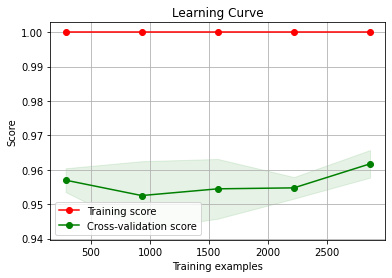

In [43]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
#Vizualization
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
#from IPython.display import Image
import pydotplus
#import cv2 as cv
import matplotlib.pyplot as plt
from scikitplot.estimators import plot_learning_curve

df=pd.read_csv('pulsar_stars.csv')

#We first decide on how to split the data into features and labels
#features:
features=df.columns[:-1]
X=df[features]
#output:
y=df.target_class

#Now we need to split te data using train_test_split.This requires us to choose said split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=123)
#This will give a training:test ratio of 8:2. Random state is set so that we get the same results in a different run

#We now make the classifier
classifier=DecisionTreeClassifier()

#Training
classifier=classifier.fit(X_train, y_train)
#Preducting the response for the test dataset
y_pred=classifier.predict(X_test)

#Let's see how accurate our model is likely to be 
score = metrics.accuracy_score(y_test, y_pred)* 100
print('Accuracy = {}'.format(score))

compare_score['Decision Tree Classifier'] = score

plot_learning_curve(classifier, X_test, y_test)
plt.show()

## **Random Forest Classifier**

Test accuracy: 97.90502793296089%


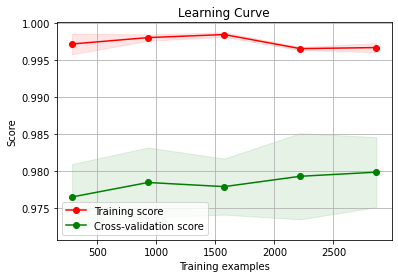

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from scikitplot.estimators import plot_learning_curve

df=pd.read_csv('pulsar_stars.csv')

x_data=df.drop(columns='target_class')
X=StandardScaler().fit_transform(x_data)
y=df.target_class.values

x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

rf=RandomForestClassifier(random_state=42, n_estimators=10)

rf.fit(x_train, y_train)

rf_score=rf.score(x_test, y_test)*100
compare_score['Random Forest'] = rf_score

print('Test accuracy: {}%'.format(rf_score))

plot_learning_curve(rf, x_test, y_test)
plt.show()

## **Support Vector Machine**

Test accuracy: 97.9608938547486%


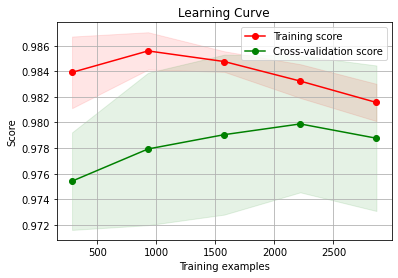

In [46]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

df=pd.read_csv('pulsar_stars.csv')

x_data=df.drop(columns='target_class')
X=StandardScaler().fit_transform(x_data)
y=df.target_class.values

x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

svm=SVC(random_state=42, gamma = 'scale')
svm=svm.fit(x_train, y_train)

svm_score=svm.score(x_test, y_test)*100
compare_score['SVM'] = svm_score

print('Test accuracy: {}%'.format(svm_score))

plot_learning_curve(svm, x_test, y_test)
plt.show()

## **Artificial Neural Network**

Epoch 1/15
960/960 [==============================] - 2s 2ms/step - loss: 0.3589 - accuracy: 0.9173 - val_loss: 0.1017 - val_accuracy: 0.9763
Epoch 2/15
960/960 [==============================] - 1s 1ms/step - loss: 0.1024 - accuracy: 0.9775 - val_loss: 0.0792 - val_accuracy: 0.9774
Epoch 3/15
960/960 [==============================] - 1s 1ms/step - loss: 0.0775 - accuracy: 0.9793 - val_loss: 0.0735 - val_accuracy: 0.9780
Epoch 4/15
960/960 [==============================] - 1s 1ms/step - loss: 0.0694 - accuracy: 0.9818 - val_loss: 0.0698 - val_accuracy: 0.9784
Epoch 5/15
960/960 [==============================] - 1s 1ms/step - loss: 0.0741 - accuracy: 0.9802 - val_loss: 0.0677 - val_accuracy: 0.9790
Epoch 6/15
960/960 [==============================] - 1s 1ms/step - loss: 0.0660 - accuracy: 0.9823 - val_loss: 0.0675 - val_accuracy: 0.9795
Epoch 7/15
960/960 [==============================] - 1s 1ms/step - loss: 0.0673 - accuracy: 0.9809 - val_loss: 0.0657 - val_accuracy: 0.9793
Epoch 

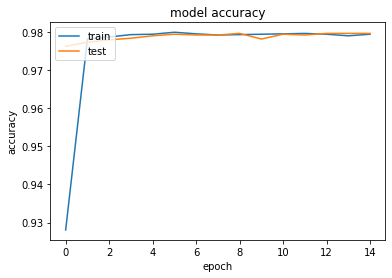

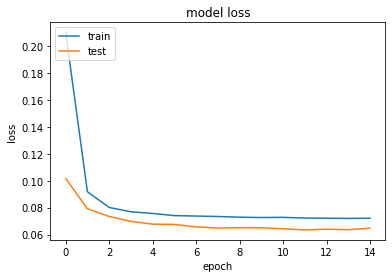

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from scikitplot.estimators import plot_learning_curve
df=pd.read_csv('pulsar_stars.csv')

x_data=df.drop(columns='target_class')
X=StandardScaler().fit_transform(x_data)
y=df.target_class.values

x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

#making the classifier
classifier=Sequential()

#first hidden layer
#we have 8 input features, 1 output and the kernel_initializer uses a normal distribution to
#function
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal', input_dim=8))

#second
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))

#output
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

#compiling the network
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#fitting the data to the training set
history=classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=15)

#evaluate the loss value and metrics values for the model in test mode using evaluate funcn.
eval_model=classifier.evaluate(x_train, y_train)
print('\n eval_model: ', eval_model)

#prediction
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5) #if prediction is greater than 0.5, output=1, otherwise=0

cm=confusion_matrix(y_test, y_pred)
print(cm)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

,Algorithms,Percentage
0,Logistic Regression,96.648045
1,Decision Tree Classifier with Ada Boost Classi...,96.173184
2,Random Forest,97.905028
3,Decision Tree Classifier,96.229050
4,SVM,97.960894
5,Decision Tree Classifier with Ada Boost,97.010000


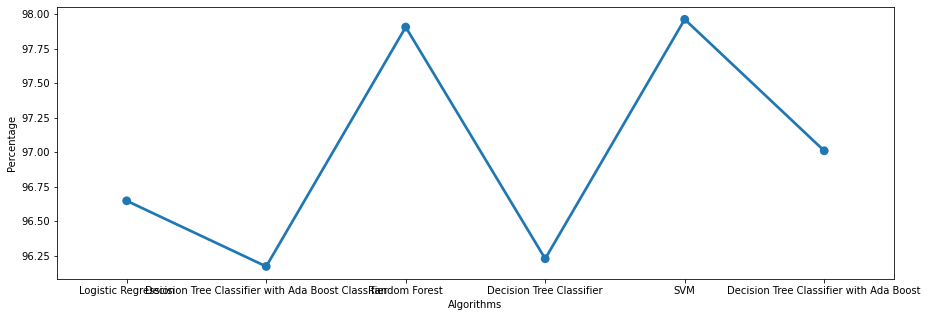

In [47]:
fig, (ax1) = plt.subplots(ncols = 1, sharey = True,figsize = (15,5))
df = pd.DataFrame(list(compare_score.items()),columns = ['Algorithms','Percentage'])
display(df)
sns.pointplot(x = "Algorithms", y = "Percentage", data = df,ax = ax1);